# Projeto 1 - Base de Dados Covid

##### Turma 780
##### Aluno: Miguel Belardinelli Prytoluk

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>

# 1 - __Preparação dos Dados e Verificação de Consistência__

In [2]:
# Importando as principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
# Lendo a base de "./COVID.csv"
df = pd.read_csv("./COVID.csv", index_col="Unnamed: 0")

In [4]:
# Imprimindo informações básicas da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              107424 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            245258 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [5]:
# Visualização geral dos dados
df

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,1,NaN,1.0,77,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,NaN
499688,0,0,1.0,1.0,63,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0
499689,1,1,NaN,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
499690,1,1,NaN,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,NaN


In [6]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,499692.000000,499692.000000,107424.000000,499681.000000,499692.000000,245258.000000,498051.000000,498246.000000,498250.000000,498030.000000,498203.000000,497499.000000,498183.000000,498222.000000,498216.000000,498113.000000,346017.000000,499692.000000,107423.000000
mean,0.493492,0.784775,0.084739,0.157533,42.545942,0.014736,0.125186,0.016610,0.032542,0.016206,0.163267,0.030939,0.022921,0.164443,0.020110,0.086235,0.569238,0.441586,0.083865
std,0.499958,0.410978,0.278494,0.364302,16.640391,0.120492,0.330930,0.127806,0.177434,0.126267,0.369609,0.173152,0.149653,0.370677,0.140376,0.280712,0.495184,0.496577,0.277186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Preenchimento de colunas nulas

In [7]:
# A base de dados de apresenta dados nulos de entubação (intubed) e internação em UTI (icu) para pacientes do tipo 1, ou seja, que foram dispensados para casa.
# Trataremos esses dados colocando valor 0, pois de fato não foram entubados ou internados em UTI.
df.loc[df["patient_type"] == 1, ["intubed"]] = 0
df.loc[df["patient_type"] == 1, ["icu"]] = 0

In [8]:
# Utilizaremos de lógica similar para dados de gravidez.
# Trataremos os dados nulos de gravidez para pessoas do sexo 0 (homens), atribuindo valor 0,
# assumindo não haver possibilidade de gravidez.
df.loc[df["sex"] == 0, ["pregnancy"]] = 0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              499570 non-null  float64
 3   pneumonia            499681 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            498356 non-null  float64
 6   diabetes             498051 non-null  float64
 7   copd                 498246 non-null  float64
 8   asthma               498250 non-null  float64
 9   inmsupr              498030 non-null  float64
 10  hypertension         498203 non-null  float64
 11  other_disease        497499 non-null  float64
 12  cardiovascular       498183 non-null  float64
 13  obesity              498222 non-null  float64
 14  renal_chronic        498216 non-null  float64
 15  tobacco          

In [10]:
# Função para plotar gráficos padronizados
def pd_plot(plots_list, x_label, y_label, reset_ax2 = False, ax2_obj = None, grid_axis = None, xticks=None, xlim=None):
    fig, ax = plt.subplots(figsize=(10,10))
    for plot in plots_list:
        plot["method"](**plot["params"])
    ax.title.set_size(18)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    # Coloca os ticks (números de legenda) no eixo x -> Iterável: (1, 5, 10...)
    if xticks is not None:
        ax.set_xticks(xticks)
    # Limita os valores de x entre menor e maior(inclusive) -> Tupla: (menor, maior)
    if xlim is not None:
        ax.set_xlim(xlim)
    # Adiciona eixos de grid -> String: "x"/"y"/"both"
    if grid_axis is not None:
        ax.grid(axis=grid_axis)
    # Reseta o eixo do segundo gráfico: coloca o limite y mínimo em 0 e remove os ticks
    if reset_ax2:
        ax.right_ax.set_ylim(ymin=0)
        ax.right_ax.set_yticks([])
    # Plota segundo eixo, aplicando função em cada item do eixo 1 -> Objeto: {"func": func, "label": str}
    if ax2_obj is not None:
        ax2 = ax.twinx()
        ax2.set_ylim(ax.get_ylim())
        ax_ticks = ax2.get_yticks()[0:-1]
        ax2.set_yticks(ax_ticks)
        ax2.set_yticklabels(map(ax2_obj["func"], ax_ticks))
        ax2.set_ylabel(ax2_obj["label"])

    ax.set_facecolor('#d8dcd6')
    plt.show()

In [11]:
# Plota gráfico comparando contagens de atributo
def plot_attr(attr, x_label, title):
    c = df[attr].value_counts(dropna=False)
    p = df[attr].value_counts(dropna=False, normalize=True).mul(100).round(2).astype(str) + '%'
    cp = pd.concat([c,p], axis=1, keys=['Quantidade', 'Frequência'])
    plots_list = [{
            "method":  c.plot.bar,
            "params": {
                "color": sns.color_palette("tab10"),
                "title": title,
                "rot": 0,
            }
        }]

    ax2_obj = {
        "func": lambda x: f'{(x / df[attr].size):0.1f}',
        "label": "Frequência"
    }
    pd_plot(plots_list, x_label=x_label,y_label='Quantidade', ax2_obj=ax2_obj, grid_axis="y")
    
    # Analisando a proporcionalidade da target
    print(f"Proporcionalidade da variável {attr}:")
    print(cp)

##### Análise fina dos dados de contato com outras pessoas diagnosticadas com COVID

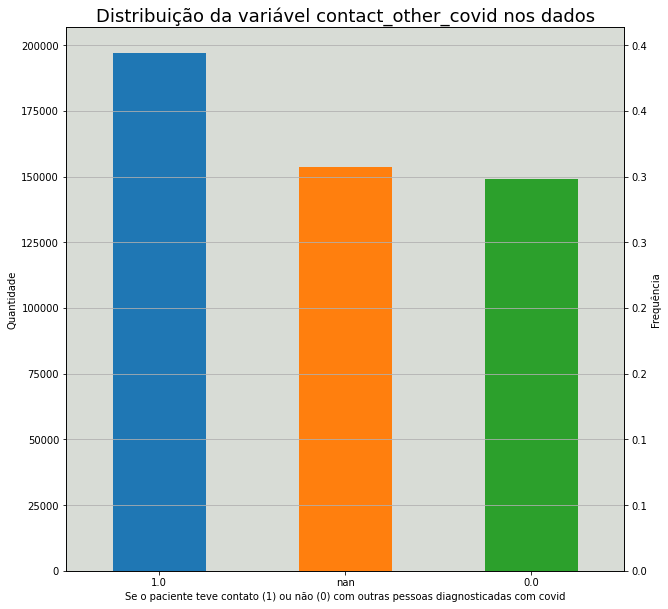

Proporcionalidade da variável contact_other_covid:
     Quantidade Frequência
1.0      196966     39.42%
NaN      153675     30.75%
0.0      149051     29.83%


In [12]:
plot_attr(attr="contact_other_covid",
        x_label="Se o paciente teve contato (1) ou não (0) com outras pessoas diagnosticadas com covid",
        title="Distribuição da variável contact_other_covid nos dados")

In [13]:
# A base de dados de contato com outras pessoas diagnosticadas com COVID tem 30% de dados faltantes
df.contact_other_covid.value_counts(dropna=False, normalize=True).loc[np.nan]

0.30753944429768737

In [14]:
# Análise de variáveis binárias em dois grupos
def test_binary_vars(g1, g2, g1_name, g2_name, bin_vars):
    for bin_var in bin_vars:
        print(bin_var)
        print(g1_name)
        print(g1[bin_var].value_counts(normalize=True))
        print(g2_name)
        print(g2[bin_var].value_counts(normalize=True))

        print(ttest_ind(g1[bin_var].dropna(), g2[bin_var].dropna()))
        print('*' * 20)

In [15]:
# Compara as variáveis binárias entre o grupo que tem o valor de contato preenchido e o que tem valor nulo
notna_contact = df[df.contact_other_covid.notna()]
isna_contact = df[df.contact_other_covid.isna()]
bin_feats = np.delete(df.columns, np.argwhere(df.columns == "age"))
test_binary_vars(notna_contact, isna_contact, "notNA Contact", "isNA Contact", bin_feats)

sex
notNA Contact
0    0.50749
1    0.49251
Name: sex, dtype: float64
isNA Contact
0    0.504298
1    0.495702
Name: sex, dtype: float64
Ttest_indResult(statistic=-2.0823787370176525, pvalue=0.03730839648193874)
********************
patient_type
notNA Contact
1    0.847664
0    0.152336
Name: patient_type, dtype: float64
isNA Contact
1    0.643176
0    0.356824
Name: patient_type, dtype: float64
Ttest_indResult(statistic=166.7665131388045, pvalue=0.0)
********************
intubed
notNA Contact
0.0    0.979224
1.0    0.020776
Name: intubed, dtype: float64
isNA Contact
0.0    0.98753
1.0    0.01247
Name: intubed, dtype: float64
Ttest_indResult(statistic=20.263865601121065, pvalue=2.9177441488388384e-91)
********************
pneumonia
notNA Contact
0.0    0.870691
1.0    0.129309
Name: pneumonia, dtype: float64
isNA Contact
0.0    0.77892
1.0    0.22108
Name: pneumonia, dtype: float64
Ttest_indResult(statistic=-82.7353981453282, pvalue=0.0)
********************
pregnancy
notNA Contact
0.0

In [16]:
df

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0,1,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,0,0,0.0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,1,0.0,1.0,77,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0
499688,0,0,1.0,1.0,63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0
499689,1,1,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
499690,1,1,0.0,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0


#### Estratégia da coluna contato

In [17]:
# A estratégia utilizada é remover a coluna de contato, tendo em vista o alto índice de valores nulos
# e explorar métodos de imputação de dados nesta coluna

df_contato = df.contact_other_covid
# Cria base de dados sem a coluna de contato e sem valores nulos, com as colunas como int
df = df.drop(['contact_other_covid'], axis=1).dropna().astype(int, errors = 'ignore')
# Cria data_frame adicionando a coluna de contato novamente, com valores nulos, para fazer a imputação
df_nans = df.join(df_contato)
df_nans

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu,contact_other_covid
0,0,1,0,0,27,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0
1,0,1,0,0,24,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
2,1,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,1,0,NaN
3,0,0,0,1,30,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
4,1,0,0,0,60,0,1,0,0,0,1,0,1,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,1,0,1,77,0,0,0,0,0,0,1,0,0,0,1,0,0,0.0
499688,0,0,1,1,63,0,0,0,0,0,1,0,0,1,0,1,0,0,0.0
499689,1,1,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499690,1,1,0,0,45,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0


In [18]:
df.head(10)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu
0,0,1,0,0,27,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,24,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,30,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,60,0,1,0,0,0,1,0,1,0,0,0,1,0
5,0,0,0,1,47,0,1,0,0,0,0,0,0,0,0,0,1,1
6,0,0,0,0,63,0,0,0,0,0,1,0,0,0,0,0,1,0
7,1,1,0,0,56,0,0,0,0,0,1,0,0,0,1,1,1,0
8,1,1,0,0,41,0,0,0,0,0,0,0,0,0,0,0,1,0
9,1,0,1,1,39,0,0,0,0,0,0,0,0,1,0,0,1,0


# 2 - __Análise Exploratória dos Dados__

In [19]:
# Observando a correlação das variáveis
df.corr()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu
sex,1.000000,0.097219,-0.040128,-0.086603,-0.037423,0.086825,-0.017264,-0.005310,0.046901,0.007746,-0.009289,0.026828,-0.010598,0.018438,-0.015933,-0.104332,-0.072949,-0.036714
patient_type,0.097219,1.000000,-0.257430,-0.656185,-0.324326,-0.011162,-0.265814,-0.123196,0.018015,-0.098037,-0.239463,-0.091837,-0.104336,-0.064171,-0.151780,-0.006890,-0.204282,-0.257310
intubed,-0.040128,-0.257430,1.000000,0.282151,0.093703,-0.006261,0.084719,0.028827,-0.009936,0.023320,0.069450,0.017870,0.033494,0.035789,0.037031,0.003437,0.075847,0.489888
pneumonia,-0.086603,-0.656185,0.282151,1.000000,0.284069,-0.014569,0.221639,0.096450,-0.016471,0.065861,0.194299,0.051612,0.081236,0.071227,0.108142,0.010354,0.202364,0.249660
age,-0.037423,-0.324326,0.093703,0.284069,1.000000,-0.072426,0.332715,0.177601,-0.027449,0.031827,0.393796,0.038469,0.137329,0.085696,0.104404,0.015423,0.167754,0.066566
pregnancy,0.086825,-0.011162,-0.006261,-0.014569,-0.072426,1.000000,-0.024750,-0.009237,0.001331,-0.001704,-0.029699,0.013200,-0.009884,-0.016583,-0.009347,-0.017805,-0.008026,0.000602
diabetes,-0.017264,-0.265814,0.084719,0.221639,0.332715,-0.024750,1.000000,0.103722,0.001033,0.054315,0.376170,0.032563,0.111818,0.115534,0.170398,0.015910,0.105931,0.073345
copd,-0.005310,-0.123196,0.028827,0.096450,0.177601,-0.009237,0.103722,1.000000,0.035591,0.059731,0.122782,0.038052,0.114871,0.038032,0.068645,0.070694,0.007178,0.025371
asthma,0.046901,0.018015,-0.009936,-0.016471,-0.027449,0.001331,0.001033,0.035591,1.000000,0.021017,0.015573,0.016622,0.019158,0.045608,0.001112,0.005714,-0.024900,-0.005771
inmsupr,0.007746,-0.098037,0.023320,0.065861,0.031827,-0.001704,0.054315,0.059731,0.021017,1.000000,0.046588,0.139985,0.066548,0.014226,0.117417,0.010829,-0.017217,0.032595


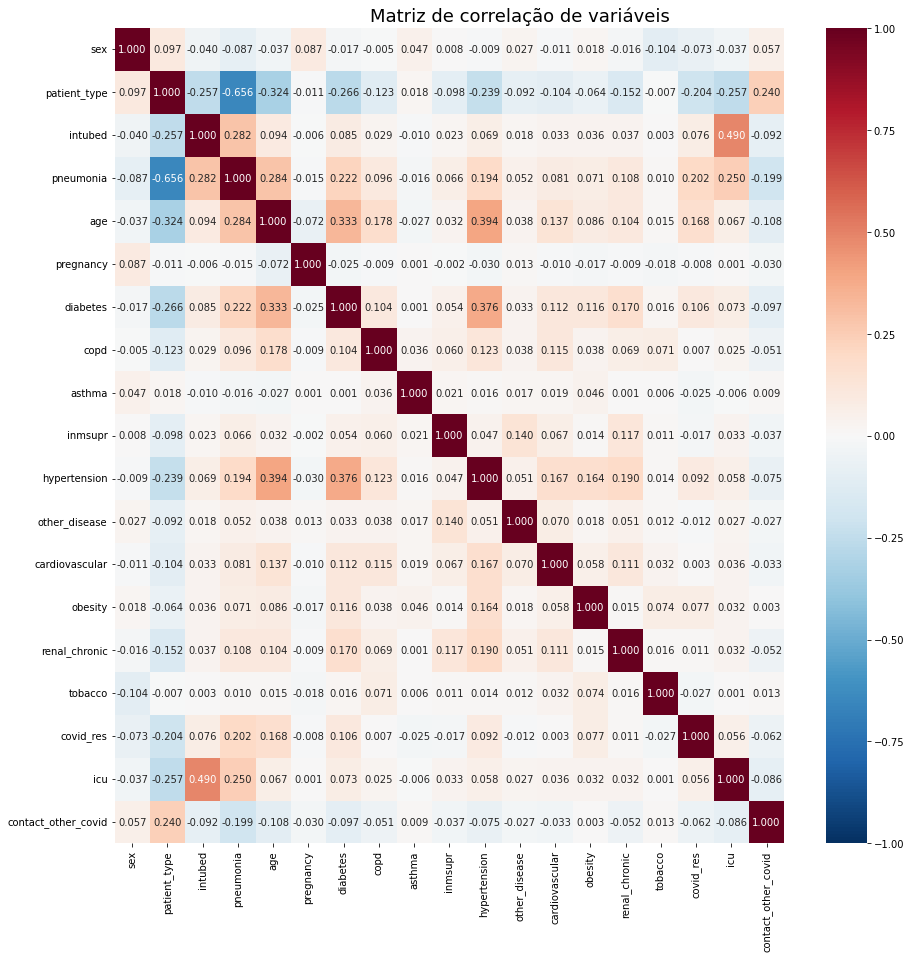

In [20]:
# Plotando a matriz de correlação das variáveis
fig, ax = plt.subplots(figsize=(15,15))
plt.suptitle('Matriz de correlação de variáveis', y=0.90, fontsize=18)
sns.heatmap(df_nans.corr(), annot=True, fmt='.3f', vmin=-1, vmax=1, cmap='RdBu_r')
ax.set_facecolor('#d8dcd6')

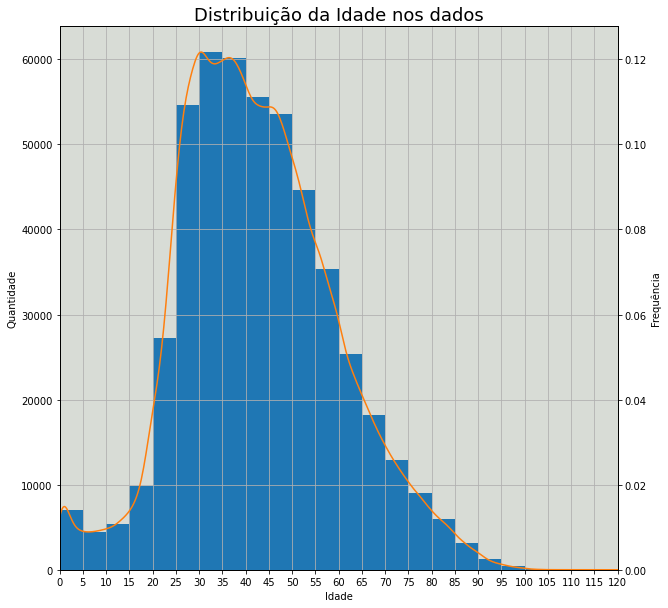

In [21]:
# Plotando distribuição dos dados por idade
plots_list = [
    {
        "method":  df.age.plot.hist,
        "params": {
            "title":"Distribuição da Idade nos dados",
            # "density":True,
            "bins": 24,
        }
    },
    {
        "method": df.age.plot.kde,
        "params": { "secondary_y":True,}
    }]


max_age = df.age.max()
xticks = range(0, max_age + 1, 5)

xlim = (0, max_age)
pd_plot(plots_list, x_label="Idade", y_label='Quantidade',
    reset_ax2 = True, ax2_obj= {"func": lambda x: f'{(x / df.age.size):0.2f}', "label": "Frequência"},
    xticks = xticks, xlim = xlim, grid_axis="both")


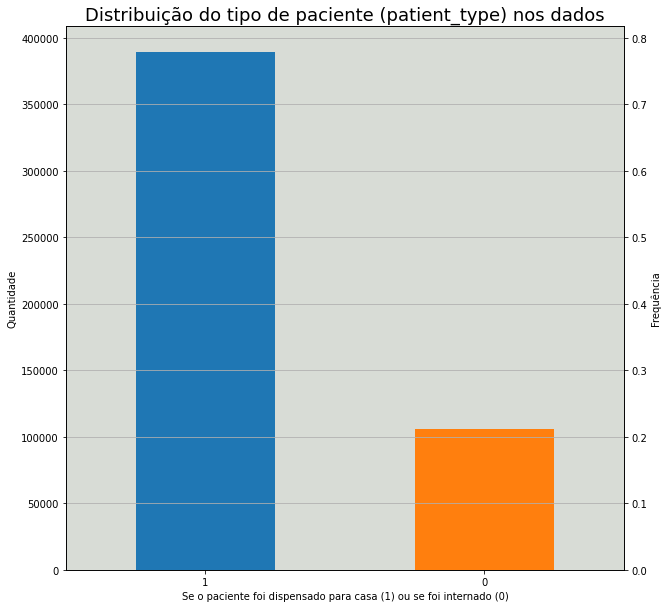

Proporcionalidade da variável patient_type:
   Quantidade Frequência
1      389117     78.62%
0      105831     21.38%


In [22]:
plot_attr(attr="patient_type",
        x_label="Se o paciente foi dispensado para casa (1) ou se foi internado (0)",
        title="Distribuição do tipo de paciente (patient_type) nos dados")

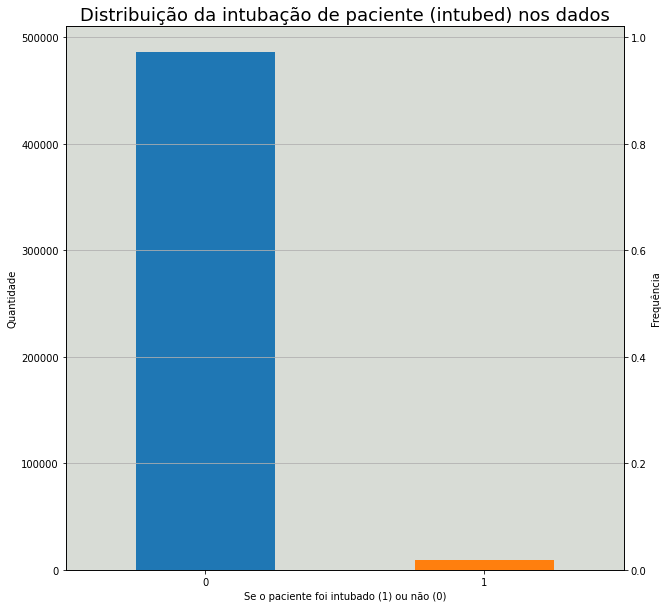

Proporcionalidade da variável intubed:
   Quantidade Frequência
0      486185     98.23%
1        8763      1.77%


In [23]:
plot_attr(attr="intubed",
        x_label="Se o paciente foi intubado (1) ou não (0)",
        title="Distribuição da intubação de paciente (intubed) nos dados")

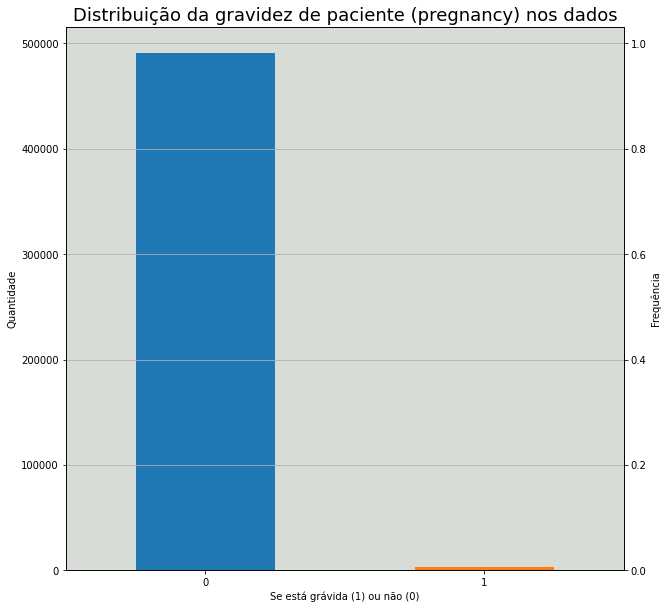

Proporcionalidade da variável pregnancy:
   Quantidade Frequência
0      491349     99.27%
1        3599      0.73%


In [24]:
plot_attr(attr="pregnancy",
        x_label="Se está grávida (1) ou não (0)",
        title="Distribuição da gravidez de paciente (pregnancy) nos dados")

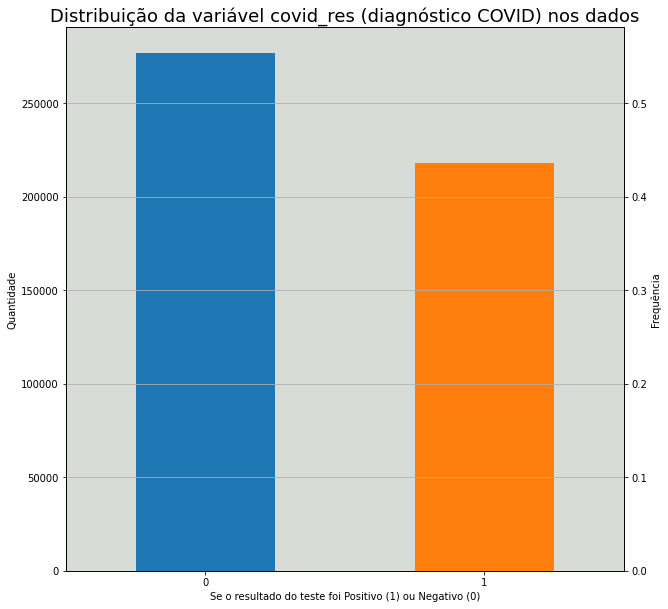

Proporcionalidade da variável covid_res:
   Quantidade Frequência
0      276757     55.92%
1      218191     44.08%


In [25]:
plot_attr(attr="covid_res",
        x_label="Se o resultado do teste foi Positivo (1) ou Negativo (0)",
        title="Distribuição da variável covid_res (diagnóstico COVID) nos dados")

##### Preenchimento das colunas nulas de "contact_other_covid"

In [26]:
# Instala bibliotecas necessárias para datawig
%pip install datawig --no-deps
%pip install mxnet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [27]:
df_nans

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu,contact_other_covid
0,0,1,0,0,27,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0
1,0,1,0,0,24,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
2,1,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,1,0,NaN
3,0,0,0,1,30,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN
4,1,0,0,0,60,0,1,0,0,0,1,0,1,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,1,0,1,77,0,0,0,0,0,0,1,0,0,0,1,0,0,0.0
499688,0,0,1,1,63,0,0,0,0,0,1,0,0,1,0,1,0,0,0.0
499689,1,1,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499690,1,1,0,0,45,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0


#### Datawig

In [28]:
# DataWig é uma biblioteca da AWS de preenchimento de dados em tabelas utilizando machine learning

import datawig

input_columns = ['patient_type', 'intubed', 'pneumonia', 'age', 'diabetes', 'icu']

def imputeDW(df):
    notna_contact = df[df.contact_other_covid.notna()]
    isna_contact = df[df.contact_other_covid.isna()]

    #Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=input_columns, # column(s) containing information about the column we want to impute
        output_column= 'contact_other_covid', # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
        )

    #Fit an imputer model on the train data
    imputer.fit(train_df=notna_contact, num_epochs=50)

    #Impute missing values and return original dataframe with predictions
    imputed = imputer.predict(isna_contact)

    return imputed.sort_index()
    
# imputeDW(df_nans).to_csv("imputed_dw.csv")


In [29]:
imputedDW = pd.read_csv("imputed_dw.csv", index_col="Unnamed: 0")
imputedDW

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu,contact_other_covid,contact_other_covid_imputed
1,0,1,0,0,24,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0.621034
2,1,0,0,0,54,0,0,0,0,0,0,0,0,1,0,0,1,0,NaN,0.290025
3,0,0,0,1,30,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0.220789
4,1,0,0,0,60,0,1,0,0,0,1,0,1,0,0,0,1,0,NaN,0.176064
5,0,0,0,1,47,0,1,0,0,0,0,0,0,0,0,0,1,1,NaN,0.182998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499650,1,1,0,0,38,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.631879
499653,1,1,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.631879
499674,1,1,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.623132
499680,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,0.156510


In [30]:
# Retorna a quantidade de NAs independente do tipo de variáveis
def quantNA(X):
	return np.count_nonzero(pd.isna(X))

In [31]:
quantNA(df_nans.contact_other_covid)

152344

In [32]:
# Threshold de classificação positiva para contato
dw_threshold = 0.5
imputedDWCont = imputedDW.contact_other_covid_imputed >= dw_threshold
# Series de contato preenchida pelo datawig
dwContact = df_nans.contact_other_covid.fillna(imputedDWCont).astype(int)

dwContact.value_counts(normalize=True)

1    0.582019
0    0.417981
Name: contact_other_covid, dtype: float64

In [33]:
dwContact

0         0
1         1
2         0
3         0
4         0
         ..
499687    0
499688    0
499689    0
499690    1
499691    1
Name: contact_other_covid, Length: 494948, dtype: int64

In [34]:
quantNA(dwContact)

0

In [35]:
dwContact.head()

0    0
1    1
2    0
3    0
4    0
Name: contact_other_covid, dtype: int64

#### KNN Imputer

In [36]:

df_for_input = df_nans[input_columns + ['contact_other_covid']]
df_for_input

,patient_type,intubed,pneumonia,age,diabetes,icu,contact_other_covid
0,1,0,0,27,0,0,0.0
1,1,0,0,24,0,0,NaN
2,0,0,0,54,0,0,NaN
3,0,0,1,30,0,0,NaN
4,0,0,0,60,1,0,NaN
...,...,...,...,...,...,...,...
499687,1,0,1,77,0,0,0.0
499688,0,1,1,63,0,0,0.0
499689,1,0,0,25,0,0,0.0
499690,1,0,0,45,0,0,1.0


In [37]:
from sklearn.impute import KNNImputer

# Insere dados na base=X, com nome de columnas=columns, utilizando os números de K=kNs
def imputeKNN(X, columns, kNs):
	# Printa número de dados faltantes na base
	print(f'Faltando: {quantNA(X)}')
	for k in kNs:
		imputer = KNNImputer(n_neighbors=k)
		# Faz o fit transform na base
		Xtrans = imputer.fit_transform(X)
		# Printa número de dados faltantes na base (deve ser 0)
		print(f'Com o k {k}, faltando: {quantNA(Xtrans)}')
		# Salva o resultado em um csv
		pd.DataFrame(Xtrans, columns=columns).to_csv(f"imputed_knn_{k}.csv")


vals = df_for_input.values
columns = df_for_input.columns
# Seleciona números para k
kNs = np.arange(1,13,2)
# imputeKNN(vals,columns,kNs)

In [38]:
# Threshold de classificação positiva para contato
knn_threshold = 0.5

knnContact =  pd.concat([(pd.read_csv(f"imputed_knn_{k}.csv",                       \
                                    index_col="Unnamed: 0",                         \
                                    usecols=["Unnamed: 0", 'contact_other_covid'])  \
                        .contact_other_covid                                        \
                        .rename(f'k{k}')                                            \
                        >= knn_threshold)                                           \
                        .astype(int)                                                \
                        for k in kNs], axis=1).set_index(dwContact.index)

knnContact

,k1,k3,k5,k7,k9,k11
0,0,0,0,0,0,0
1,1,1,1,1,1,1
2,0,0,0,0,0,1
3,0,0,0,0,0,0
4,1,1,0,0,0,0
...,...,...,...,...,...,...
499687,0,0,0,0,0,0
499688,0,0,0,0,0,0
499689,0,0,0,0,0,0
499690,1,1,1,1,1,1


In [39]:
# Dropando a target das nossas features
X = df.drop(['covid_res'], axis = 1)
# Definindo target
y = df.covid_res


In [40]:
# Verificando a proporção da target
y.value_counts(normalize=True)

0    0.559164
1    0.440836
Name: covid_res, dtype: float64

# 3 - __Modelagem dos Dados__

#### Escolha de Modelo x Estratégia de Impute

In [41]:
#Separando em train e test
from sklearn.model_selection import train_test_split

# Split de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# Testa modelos com cross-validação e gera curva ROC_AUC média:
def test_models_cross_val_roc_auc_curve(model_list, col_model_name, col_model, X, Y, strat):
    print("="*21)
    print(f"Estratégia de impute: {strat}")

    best_AUC = {"model": "", "value": 0}
    curves_AUC = []
    scores_list = []

    for mdl in model_list:
        model, model_name = mdl[col_model], mdl[col_model_name]

        print("="*21)
        print(f"Modelo: {model_name}")
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        
        # Cross Validação 
        cv = StratifiedKFold(n_splits=5)

       
        for train, test in cv.split(X, Y):
            model = mdl[col_model].fit(X.values[train], Y.values[train])
            y_score = model.predict_proba(X.values[test])
            # Calcula curva ROC e área embaixo da curva
            fpr, tpr, thresholds = roc_curve(Y.values[test], y_score[:, 1])
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            tprs[-1][0] = 0.0
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)

        # Atualiza melhor ROC_AUC se esse for maior
        if mean_auc > best_AUC["value"]:
            best_AUC = {"model": model_name, "value": mean_auc}
        
        std_auc = np.std(aucs)

        # Adiciona as curvas AUC dos modelos
        curves_AUC.append({
            "name": model_name,
            "fpr": mean_fpr,
            "tpr": mean_tpr,
            "auc": mean_auc
        })
        
    return best_AUC, curves_AUC, scores_list

In [43]:
# Plota gráfica de ROC_AUC
def plot_ROC_AUC(strat_name, roc_list):
    # Seta o tamanho do gráfico
    plt.figure(figsize=(10,10))

    best_AUC = {"model": "", "value": 0}
    for roc in roc_list:
        #Plota a média ROC_AUC de cada modelo
        plt.plot(roc["fpr"], roc["tpr"], label=f'{roc["name"]}: Média ROC_AUC = {roc["auc"]:0.2f}')
        # Atualiza melhor ROC_AUC se esse for maior
        if roc["auc"] > best_AUC["value"]:
            best_AUC = {"model": roc["name"], "value": roc["auc"]}
            
    plt.plot([0, 1], [0, 1],'r--', label='Chance', alpha=.8)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.suptitle('Cross-Validação ROC_AUC de Modelos', y=0.94, fontsize=18)
    plt.title(f'Estratégia de impute: {strat_name}',fontsize=12)
    plt.legend(loc="lower right")
    plt.show()

    print(f"Melhor modelo: {best_AUC}")
    print("="*21)

In [44]:
!pip install xgboost lightgbm

In [45]:
# Lista dos modelos testados
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb

random_seed = 42

list_models = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed)},
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)},
{'model_name': 'GradientBoosting',
 'estimator' : GradientBoostingClassifier(random_state = random_seed)},
{'model_name': 'XGBoost',
 'estimator' : XGBClassifier(use_label_encoder = False, eval_metric='logloss', random_state = random_seed)},
{'model_name': 'LightGBM',
 'estimator' : lgb.LGBMClassifier(random_state = random_seed)}
]

In [46]:
from sklearn.preprocessing import StandardScaler 

# Testando diferentes modelos em diferentes estratégias de impute dos dados
def testImputeStrats(base_X, impute_strats):
    
    best_AUC_impute = pd.DataFrame()
    curves_AUC_impute = pd.DataFrame()

    for strat in impute_strats:
        X, name = strat["impute_func"](base_X), strat["name"]
        # Normalizando dos dados
        scaler = StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns, index=X.index)

        bestROC, curves_AUC = test_models_cross_val_roc_auc_curve(list_models,
                                "model_name",
                                "estimator",
                                X,
                                y_train,
                                name,)

        # Plota as curvas AUC dos modelos
        plot_ROC_AUC(name, curves_AUC)

        param_serie = pd.Series([strat["name"], bestROC["model"], bestROC["value"]],\
            index=["impute","model","ROC_AUC"])
            
        best_AUC_impute = best_AUC_impute.append( param_serie, ignore_index=True)

        for c in curves_AUC:
            curve_series = pd.Series( [strat["name"], c["name"], c["auc"]] + \
            [fpr for fpr in c["fpr"]] + \
            [tpr for tpr in c["tpr"]],  \
            index=["strat", "name", "auc"] + \
                [f'fpr{i}' for i, fpr in enumerate(c["fpr"])] + \
                [f'tpr{i}' for i, tpr in enumerate(c["tpr"])])
                
            curves_AUC_impute = curves_AUC_impute.append(curve_series, ignore_index=True)
        
    return best_AUC_impute, curves_AUC_impute

impute_strats = [
    { "name": "drop", "impute_func": lambda X: X},
    { "name": "datawig", "impute_func": lambda X: X.join(dwContact.rename("contact_other_covid"))}   
] + [{ "name": f"knn{k}", "impute_func": lambda X: X.join(knnContact[f'k{k}'].rename("contact_other_covid")) } for k in kNs]


# best_AUC_impute, curves_AUC_impute = testImputeStrats(X_train, impute_strats)

# best_AUC_impute.sort_values("ROC_AUC", ascending=False).to_csv("bestAUC.csv")
# curves_AUC_impute.to_csv("curvesAUC.csv")

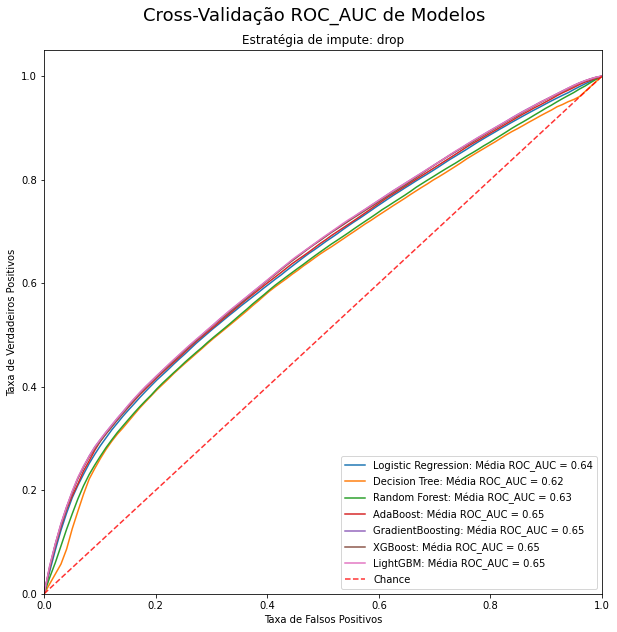

Melhor modelo: {'model': 'LightGBM', 'value': 0.6511436791541115}


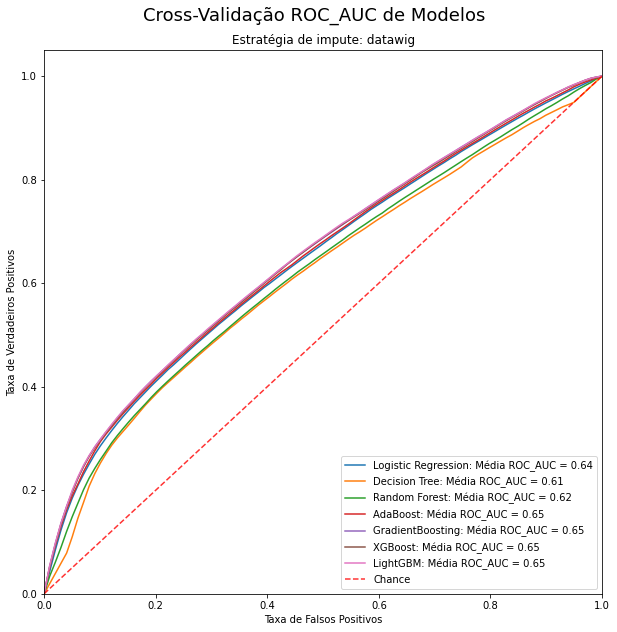

Melhor modelo: {'model': 'LightGBM', 'value': 0.6522719970391242}


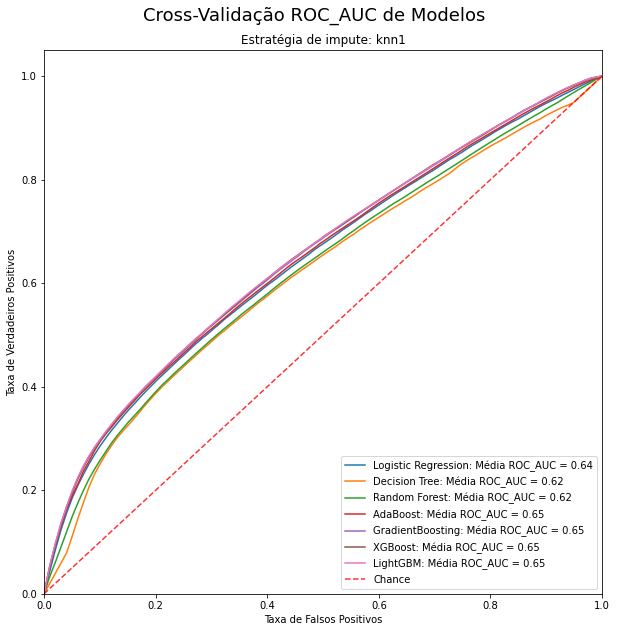

Melhor modelo: {'model': 'LightGBM', 'value': 0.6523795454729207}


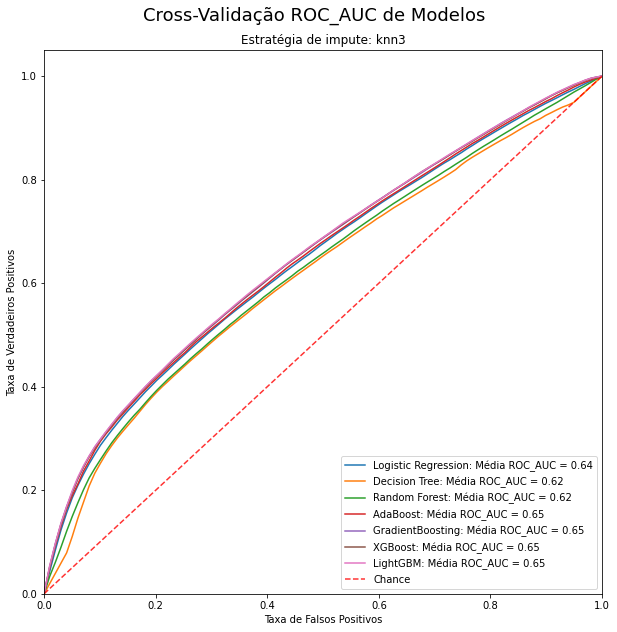

Melhor modelo: {'model': 'LightGBM', 'value': 0.6524440455846491}


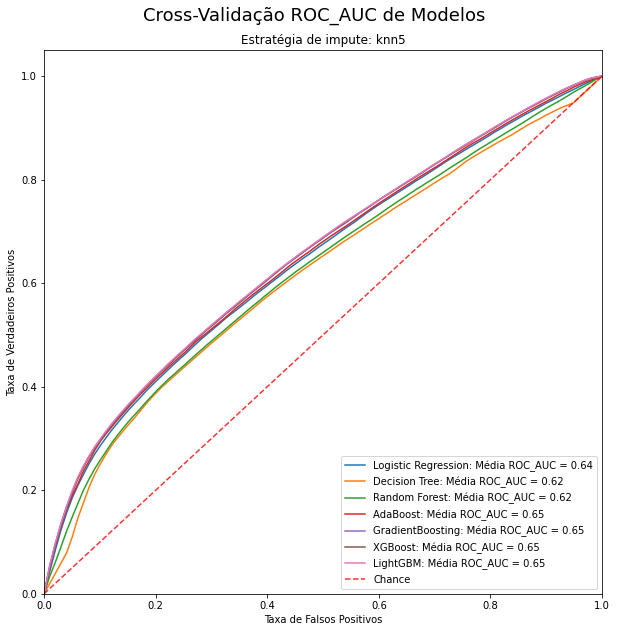

Melhor modelo: {'model': 'LightGBM', 'value': 0.6524190066752279}


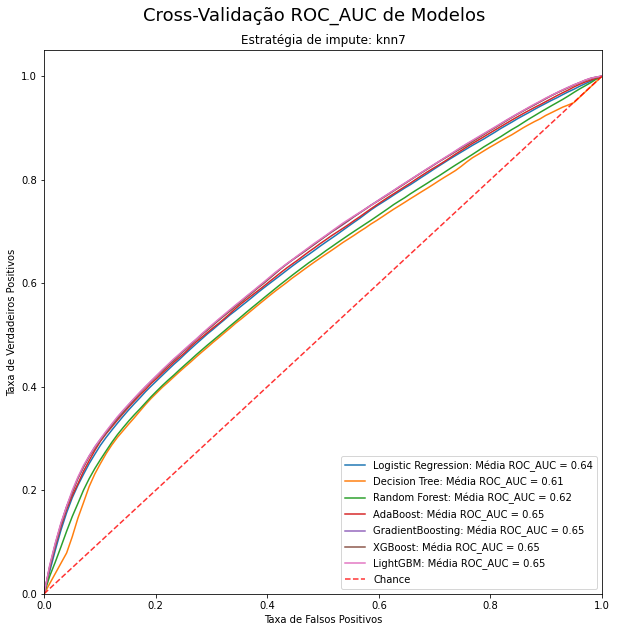

Melhor modelo: {'model': 'LightGBM', 'value': 0.6522511607257185}


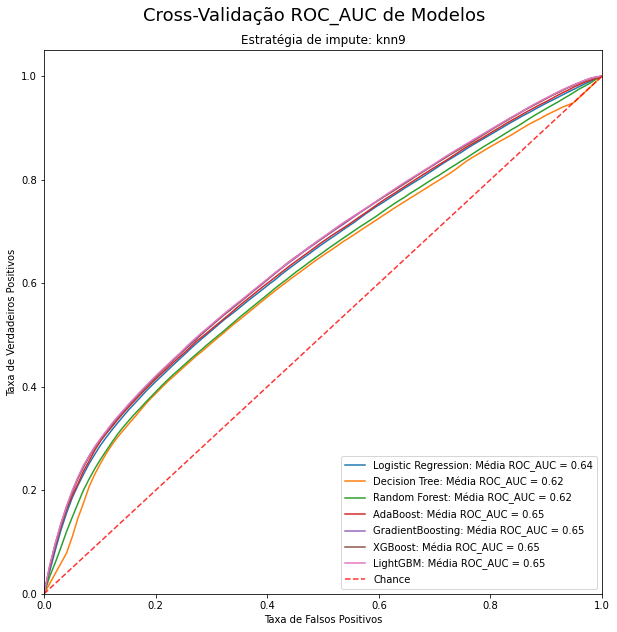

Melhor modelo: {'model': 'LightGBM', 'value': 0.6527212452902121}


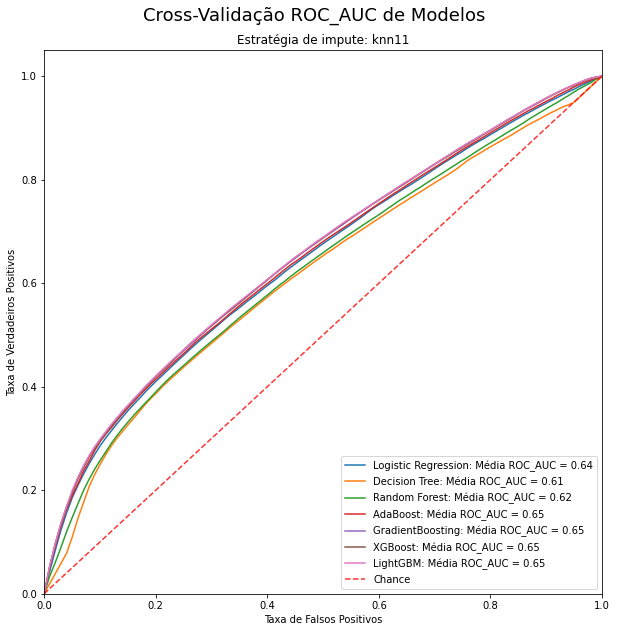

Melhor modelo: {'model': 'LightGBM', 'value': 0.6523468062759704}


In [47]:
curves_AUC_impute = pd.read_csv("curvesAUC.csv", index_col="Unnamed: 0")

# Plota os gráficos dos melhores modelos para cada estratégia de impute
for strat in curves_AUC_impute.strat.unique():
    models = curves_AUC_impute[curves_AUC_impute.strat == strat]
    roc_list = []
    for index, m in models.iterrows():
        fpr = m.filter(regex='fpr').values.tolist()
        tpr = m.filter(regex='tpr').values.tolist()
        roc_list.append({
            "name": m["name"],
            "fpr": fpr,
            "tpr": tpr,
            "auc": m["auc"]
        })
    plot_ROC_AUC(strat, roc_list)

In [48]:
best_AUC_impute = pd.read_csv("bestAUC.csv", index_col="Unnamed: 0")
print("Melhor ROC_AUC para cada estratégia de impute")
best_AUC_impute.sort_values("ROC_AUC", ascending=False)

Melhor ROC_AUC para cada estratégia de impute


,impute,model,ROC_AUC
6,knn9,LightGBM,0.652721
3,knn3,LightGBM,0.652444
4,knn5,LightGBM,0.652419
2,knn1,LightGBM,0.652380
7,knn11,LightGBM,0.652347
1,datawig,LightGBM,0.652272
5,knn7,LightGBM,0.652251
0,drop,LightGBM,0.651144


In [49]:
ROC = best_AUC_impute.ROC_AUC
maxROC = best_AUC_impute[ROC == ROC.max()]
dropROC = best_AUC_impute[best_AUC_impute.impute == "drop"]
print("Melhor ROC_AUC:")
display(maxROC)
print("Valor base (drop) de ROC_AUC:")
display(dropROC)

Melhor ROC_AUC:


,impute,model,ROC_AUC
6,knn9,LightGBM,0.652721


Valor base (drop) de ROC_AUC:


,impute,model,ROC_AUC
0,drop,LightGBM,0.651144


In [50]:
maxRV, dropRV = maxROC.ROC_AUC.iloc[0], dropROC.ROC_AUC.iloc[0]
melhora_roc_auc = maxRV - dropRV

print(f"A melhora conseguida no ROC_AUC com a técnica de impute foi de {melhora_roc_auc:.2%}")

A melhora conseguida no ROC_AUC com a técnica de impute foi de 0.16%


In [51]:
#Selecionar modelo baseado no melhor ROC
best_model_name = maxROC["model"].values[0]
best_model = [m for m in list_models if m["model_name"] == best_model_name][0]
model = best_model["estimator"]
model

LGBMClassifier(random_state=42)

In [52]:
#Selecionar estratégia de impute baseado no melhor ROC
best_strat_name = maxROC["impute"].values[0]
strat_func = [s for s in impute_strats if s["name"] == best_strat_name][0]["impute_func"]

X_train_best = strat_func(X_train)
X_test_best = strat_func(X_test)

In [53]:
X_train_best

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu,contact_other_covid
453009,1,1,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,1
18198,1,1,0,0,46,0,0,0,0,0,0,0,0,0,0,0,0,0
314672,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1
246696,1,1,0,0,31,0,0,0,0,0,0,0,0,0,0,1,0,0
114312,1,1,0,1,43,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25019,0,0,0,1,41,0,0,0,0,0,0,0,0,1,0,0,0,1
476793,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5232,1,0,0,0,60,0,1,0,0,0,1,0,0,0,0,0,0,0
153107,0,1,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,1


# 4 - __Otimização do Modelo__

#### Testando estratégias de balanceamento dos dados

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_best)
X_test_std = scaler.transform(X_test_best)
model.fit(X_train_std, y_train)

LGBMClassifier(random_state=42)

In [55]:
y_pred = model.predict(X_test_std)

In [56]:
!pip install mlxtend

#### Sem balanceamento dos dados

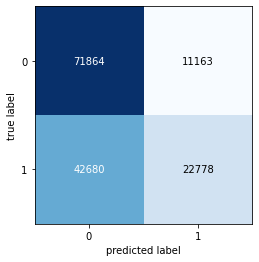

In [57]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73     83027
           1       0.67      0.35      0.46     65458

    accuracy                           0.64    148485
   macro avg       0.65      0.61      0.59    148485
weighted avg       0.65      0.64      0.61    148485



In [59]:
from sklearn.metrics import roc_auc_score
roc_normal = roc_auc_score(y_test, y_pred)

In [60]:
!pip install imblearn

#### OverSampling

In [61]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score

oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_ov, y_train_ov = oversample.fit_resample(X_train_std, y_train)

model.fit(X_train_ov, y_train_ov)
y_pred_ov = model.predict(X_test_std)
roc_over = roc_auc_score(y_test, y_pred_ov)

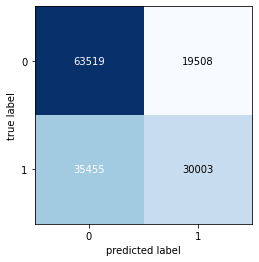

In [62]:
cm = confusion_matrix(y_test, y_pred_ov)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [63]:
print(classification_report(y_test, y_pred_ov))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70     83027
           1       0.61      0.46      0.52     65458

    accuracy                           0.63    148485
   macro avg       0.62      0.61      0.61    148485
weighted avg       0.63      0.63      0.62    148485



#### UnderSampling

In [64]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_un, y_train_un = undersample.fit_resample(X_train_std, y_train)

model.fit(X_train_un, y_train_un)
y_pred_un = model.predict(X_test_std)
roc_under = roc_auc_score(y_test, y_pred_un)

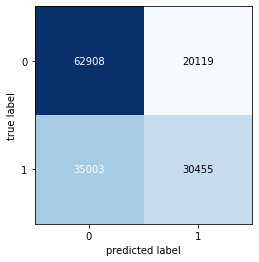

In [65]:
cm = confusion_matrix(y_test, y_pred_un)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [66]:
print(classification_report(y_test, y_pred_un))

              precision    recall  f1-score   support

           0       0.64      0.76      0.70     83027
           1       0.60      0.47      0.52     65458

    accuracy                           0.63    148485
   macro avg       0.62      0.61      0.61    148485
weighted avg       0.62      0.63      0.62    148485



#### Smote

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, n_jobs=-1)
# X_train_sm, y_train_sm = smote.fit_resample(X_train_std, y_train)

In [68]:
# pd.DataFrame(X_train_sm).to_csv("X_train_sm.csv")
# pd.Series(y_train_sm).to_csv("y_train_sm.csv")

In [69]:
import pandas as pd
X_train_sm = pd.read_csv("X_train_sm.csv", index_col="Unnamed: 0")
y_train_sm = pd.read_csv("y_train_sm.csv", index_col="Unnamed: 0")

model.fit(X_train_sm, y_train_sm)
y_pred_sm = model.predict(X_test_std)
roc_smote = roc_auc_score(y_test, y_pred_sm)

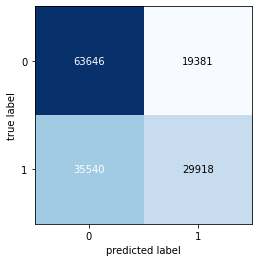

In [70]:
cm = confusion_matrix(y_test, y_pred_sm)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [71]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70     83027
           1       0.61      0.46      0.52     65458

    accuracy                           0.63    148485
   macro avg       0.62      0.61      0.61    148485
weighted avg       0.63      0.63      0.62    148485



In [72]:
y_train.value_counts()

0    193730
1    152733
Name: covid_res, dtype: int64

In [73]:
y_train_sm.value_counts()

covid_res
0            193730
1            193730
dtype: int64

In [74]:
print("Comparação dos ROC_AUC: ")
print('ROC_AUC sem Tratamento:    ', np.round(roc_normal, 3))
print('ROC_AUC com Oversampling:  ', np.round(roc_over, 3))
print('ROC_AUC com Undersampling: ', np.round(roc_under, 3))
print('ROC_AUC com SMOTE:         ', np.round(roc_smote, 3))

Comparação dos ROC_AUC: 
ROC_AUC sem Tratamento:     0.607
ROC_AUC com Oversampling:   0.612
ROC_AUC com Undersampling:  0.611
ROC_AUC com SMOTE:          0.612


- Tendo em vista que ambas as técnicas de balanceamento obtiveram resultados semelhantes, adotamos a técnica de Oversampling

#### Seleção de hiper-parâmetros com RandomizedSearchCV

In [75]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import RandomizedSearchCV

random_seed = 42

pipeline = imbpipeline(steps = [
                                ['os', RandomOverSampler(sampling_strategy='minority', random_state=42)],
                                ['scaler', StandardScaler()],
                                ['classifier', lgb.LGBMClassifier(random_state = random_seed, verbose=-1)]])
                                                                  
cv = StratifiedKFold(n_splits=5,
                                shuffle=True,
                                random_state=42)            

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
param_grid = {'classifier__learning_rate': (0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 1.0),
            'classifier__num_leaves': (24, 30, 50, 70, 80),
            'classifier__feature_fraction': (0.1, 0.3, 0.5, 0.7, 0.9),
            'classifier__bagging_fraction': (0.8, 1),
            'classifier__max_depth': (5, 7, 10, 15, 20, 30),
            'classifier__max_bin':(20, 30, 50, 70, 90),
            'classifier__min_data_in_leaf': (20, 40, 60, 80),
            'classifier__min_sum_hessian_in_leaf':(0, 10, 30, 50, 70, 100),
            'classifier__subsample': (0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 1.0),}

grid_search = RandomizedSearchCV(estimator=pipeline,
                           param_distributions=param_grid,
                           scoring='roc_auc',
                           cv=cv,
                           n_iter=500,
                           n_jobs=6,
                           verbose=3,
                           )

In [76]:
def search_params(grid_search, X, y):
    grid_search.fit(X, y)
    cv_score = grid_search.best_score_
    best_params = grid_search.best_params_
    print(f'Cross-validation score: {cv_score}\nBest params: {best_params}')

    params_results = grid_search.cv_results_["mean_test_score"]
    params_objs = [
        {
            "learning_rate": p["classifier__learning_rate"],
            "num_leaves": p["classifier__num_leaves"],
            "feature_fraction": p["classifier__feature_fraction"],
            "bagging_fraction": p["classifier__bagging_fraction"],
            "max_depth": p["classifier__max_depth"],
            "max_bin": p["classifier__max_bin"],
            "min_data_in_leaf": p["classifier__min_data_in_leaf"],
            "min_sum_hessian_in_leaf": p["classifier__min_sum_hessian_in_leaf"],
            "subsample": p["classifier__subsample"],
        } for p in grid_search.cv_results_["params"]
    ]

    params_results_df = pd.DataFrame()

    for score, obj in zip(params_results,params_objs):
        results_series = pd.Series([
            obj["learning_rate"], obj["num_leaves"], obj["feature_fraction"],
            obj["bagging_fraction"], obj["max_depth"], obj["max_bin"], obj["min_data_in_leaf"],
            obj["min_sum_hessian_in_leaf"], obj["subsample"], score
            ],\
            index=["learning_rate", "num_leaves", "feature_fraction",\
            "bagging_fraction", "max_depth", "max_bin", "min_data_in_leaf",\
            "min_sum_hessian_in_leaf", "subsample", 'roc_auc'])
        params_results_df = params_results_df.append( results_series, ignore_index=True)

    return params_results_df


# params_results_df = search_params(grid_search, X_train_best, y_train)
# params_results_df.to_csv("params_scores_roc_auc.csv")

In [77]:
params_results_df = pd.read_csv("params_scores_roc_auc.csv", index_col="Unnamed: 0")
params_results_df.sort_values("roc_auc", ascending=False)

,learning_rate,num_leaves,feature_fraction,bagging_fraction,max_depth,max_bin,min_data_in_leaf,min_sum_hessian_in_leaf,subsample,roc_auc
436,0.05,70.0,0.5,1.0,30.0,70.0,60.0,30.0,0.01,0.652926
17,0.10,70.0,0.5,1.0,20.0,70.0,60.0,70.0,1.00,0.652924
395,0.05,80.0,0.7,1.0,20.0,90.0,20.0,70.0,0.10,0.652866
376,0.05,50.0,0.5,0.8,15.0,90.0,80.0,70.0,0.01,0.652864
421,0.25,50.0,0.3,1.0,20.0,90.0,40.0,100.0,0.50,0.652862
...,...,...,...,...,...,...,...,...,...,...
479,0.01,70.0,0.1,1.0,5.0,30.0,40.0,0.0,1.00,0.637132
243,0.01,80.0,0.1,1.0,5.0,30.0,20.0,0.0,0.25,0.637131
279,0.01,80.0,0.1,0.8,10.0,20.0,20.0,0.0,0.10,0.636800
96,0.01,30.0,0.1,1.0,7.0,20.0,20.0,70.0,0.01,0.636780


In [78]:
best_hyper_params = params_results_df.sort_values("roc_auc", ascending=False).iloc[0]
best_hyper_params

learning_rate               0.050000
num_leaves                 70.000000
feature_fraction            0.500000
bagging_fraction            1.000000
max_depth                  30.000000
max_bin                    70.000000
min_data_in_leaf           60.000000
min_sum_hessian_in_leaf    30.000000
subsample                   0.010000
roc_auc                     0.652926
Name: 436, dtype: float64

#### Escolha de threshold

In [79]:
best_model = pipeline = imbpipeline(steps = [
                                ['os', RandomOverSampler(sampling_strategy='minority', random_state=42,)],
                                ['scaler', StandardScaler()],
                                ['classifier', lgb.LGBMClassifier(random_state = random_seed, verbose=-1,
                                    learning_rate = best_hyper_params["learning_rate"],
                                    num_leaves = int(best_hyper_params["num_leaves"]),
                                    feature_fraction = best_hyper_params["feature_fraction"],
                                    bagging_fraction = best_hyper_params["bagging_fraction"],
                                    max_depth = int(best_hyper_params["max_depth"]),
                                    max_bin = int(best_hyper_params["max_bin"]),
                                    min_data_in_leaf = int(best_hyper_params["min_data_in_leaf"]),
                                    min_sum_hessian_in_leaf = best_hyper_params["min_sum_hessian_in_leaf"],
                                    subsample =  best_hyper_params["subsample"],)]
                                ])
best_model.fit(X_train_best, y_train)

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=0.01 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=30.0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=30.0
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


Pipeline(steps=[('os',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('scaler', StandardScaler()),
                ['classifier',
                 LGBMClassifier(bagging_fraction=1.0, feature_fraction=0.5,
                                learning_rate=0.05, max_bin=70, max_depth=30,
                                min_data_in_leaf=60,
                                min_sum_hessian_in_leaf=30.0, num_leaves=70,
                                random_state=42, subsample=0.01, verbose=-1)]])

In [80]:
# Criando o predict proba para a base de teste
y_proba_test = best_model.predict_proba(X_test_best)
y_proba_test

array([[0.5833369 , 0.4166631 ],
       [0.54129471, 0.45870529],
       [0.63074329, 0.36925671],
       ...,
       [0.58322907, 0.41677093],
       [0.48757781, 0.51242219],
       [0.44189525, 0.55810475]])

In [81]:
# trazer a resposta para junto das probabilidades
results_test = pd.DataFrame(y_test)

# Pegando a probabilidade em estar com COVID (classe 1)
results_test['proba'] = np.round(y_proba_test[:,1], 3)

In [82]:
# Criando um dataframe com a probabilidade da classe 1 e a marcação de target
results_test.rename(columns={"Target": "target"}, inplace = True)
results_test.head()

,covid_res,proba
6476,1,0.417
207164,1,0.459
200448,1,0.369
288167,0,0.425
180628,1,0.495


In [83]:
# Parâmetros para o Looping

threshold_increment  = 0.02
threshold_begin = threshold_increment
threshold_end    = 1.0

In [84]:
# Para cada threshold, no looping calcula TN, FN, FP, TP e outras métricas

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['covid_res'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    precision = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recall = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracy = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_score = np.where((precision + recall) > 0, (2 * precision * recall)/(precision + recall), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precision, 4))
    list_recall.append(np.round(recall, 4))
    list_accuracy.append(np.round(accuracy, 4))
    list_f1_score.append(np.round(f1_score, 4))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_results = pd.DataFrame(dict_output)

0.02 0.04 0.06 0.08 0.1 0.12 0.14 0.16 0.18 0.2 0.22 0.24 0.26 0.28 0.3 0.32 0.34 0.36 0.38 0.4 0.42 0.44 0.46 0.48 0.5 0.52 0.54 0.56 0.58 0.6 0.62 0.64 0.66 0.68 0.7 0.72 0.74 0.76 0.78 0.8 0.82 0.84 0.86 0.88 0.9 0.92 0.94 0.96 0.98 1.0 

In [85]:
# Avaliando os resultados
df_results

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.02,0,0,83027,65458,0.4408,1.0000,0.4408,0.6119
1,0.04,0,0,83027,65458,0.4408,1.0000,0.4408,0.6119
2,0.06,0,0,83027,65458,0.4408,1.0000,0.4408,0.6119
3,0.08,0,0,83027,65458,0.4408,1.0000,0.4408,0.6119
4,0.10,0,0,83027,65458,0.4408,1.0000,0.4408,0.6119
5,0.12,0,0,83027,65458,0.4408,1.0000,0.4408,0.6119
6,0.14,12,3,83015,65455,0.4409,1.0000,0.4409,0.6119
7,0.16,72,15,82955,65443,0.4410,0.9998,0.4412,0.6120
8,0.18,202,37,82825,65421,0.4413,0.9994,0.4420,0.6123
9,0.20,394,59,82633,65399,0.4418,0.9991,0.4431,0.6127


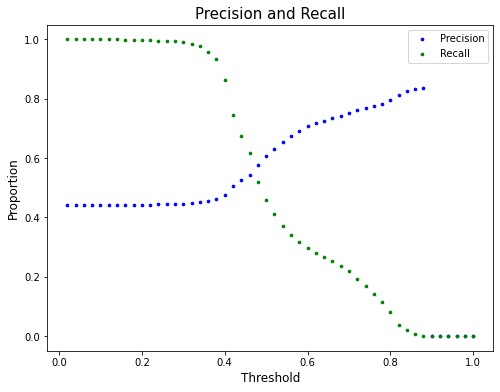

In [86]:
# Precison-Recall-Threshold Curve

# variavel de proporção para os gráficos
k = 2

# Define o tamanho da figura
fig = plt.figure(figsize = (k*4,k*3))

# Definindo a janela de plot
ax1 = fig.add_subplot(111)

# Scatter do Precision
ax1.scatter(df_results['threshold'], df_results['precision'], color = 'b', s = 7)

# Scatter do Recall
ax1.scatter(df_results['threshold'], df_results['recall']   , color = 'g', s = 7)

# Configurações dos exiso
ax1.set_xlabel('Threshold', fontsize = 12)
ax1.set_ylabel('Proportion', fontsize = 12)

# Cria titulo
plt.title("Precision and Recall", fontsize = 15)

plt.legend(['Precision', 'Recall'])
# Mostra o gráfico
plt.show()

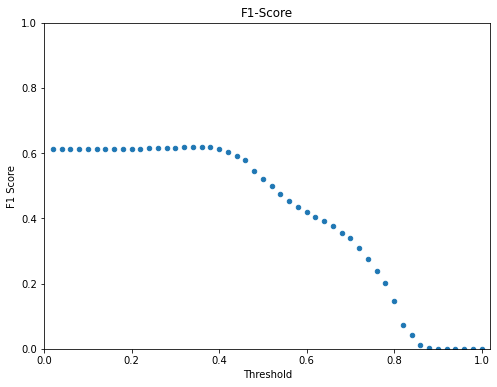

In [87]:
# Curva F1-Score

# Cria o plot
grap = df_results[df_results["threshold"] > 0.0].plot(kind="scatter", 
                                                         x="threshold", 
                                                         y="f1_score", 
                                                         grid=False, 
                                                         legend=True, 
                                                         title="F1-Score",
                                                         figsize=[8,6])
# Configurações do gráfico
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0))

# mostra o gráfico
plt.show()

Dentre os thresholds testados, o que apresentou o maior f1-score foi: 0.36

In [88]:
best_threshold = 0.36
# Cria a resposta com o novo threshold
y_pred_th = np.where(y_proba_test[:,1] >= best_threshold, 1, 0)
y_pred_th

array([1, 1, 1, ..., 1, 1, 1])

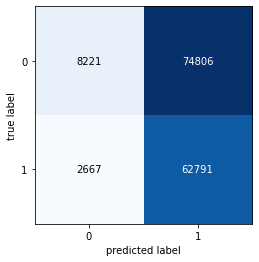

In [89]:
# Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred_th)

# plot da matriz de confusão
plot_confusion_matrix(conf_mat=cm)

# Mostra o gráfico
plt.show()

In [90]:
# Mostra o classification_report
print(classification_report(y_test, y_pred_th))

              precision    recall  f1-score   support

           0       0.76      0.10      0.18     83027
           1       0.46      0.96      0.62     65458

    accuracy                           0.48    148485
   macro avg       0.61      0.53      0.40    148485
weighted avg       0.62      0.48      0.37    148485



O valor de 0.36 parece adequado, tendo em vista que traz um recall de 96%, que garante que tenhamos muito poucos falsos negativos

#### Utilização da biblioteca SHAP para interpretação de modelos

In [91]:
!pip install shap
!pip install numba==0.53

In [92]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_best)
shap_obj = explainer(X_train_best)

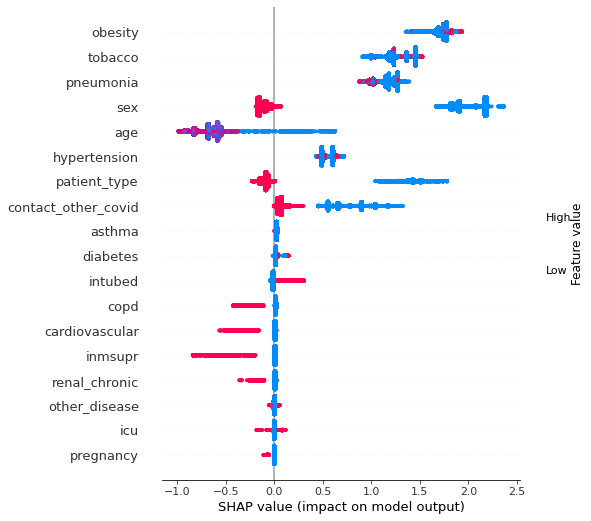

In [93]:
#Demonstrando o impacto das variáveis no modelo
shap.summary_plot(shap_values[1], X_train_best)

# 5 - __Conclusão__

- A coluna de "contact_other_covid" apresentava uma quantidade grande de dados faltantes. Foi despendida bastantes energia no processo de tentar imputar dados nesta coluna, o que não resultou em modelos muito mais performáticos até onde se pode testar.

- Comparar a matriz de correlação de variáveis com o "summary_plot" da biblioteca shap mostra que as variáveis que acabam por mais impactar no modelo não são necessariamente as que tem maior correlação.

- Utilizando o threshold de classificação de maior f1-score, alcançamos um recall de 96% para positivo em covid, porém ao custa de um recall de apenas 10% para casos negativos. Foi possível entender os limites do modelo, e quanto podemos manejar as métricas para o seu máximo.